# ny-taxi-fare-prediction-by-sneha-bajaj

Use the "Run" button to execute the code.

## Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

## Download the Dataset

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "snehagilada"
os.environ['KAGGLE_KEY'] = "10d84b24c61fca71746a2a25fca79978"

In [ ]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

100% 1.55G/1.56G [00:18<00:00, 70.1MB/s]
100% 1.56G/1.56G [00:18<00:00, 91.6MB/s]


In [ ]:
!unzip new-york-city-taxi-fare-prediction.zip

Archive:  new-york-city-taxi-fare-prediction.zip
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls -lh

total 6.9G
-rw-r--r-- 1 root root  486 Dec 12  2019 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 1.6G May 28 10:21 new-york-city-taxi-fare-prediction.zip
-rw-r--r-- 1 root root 336K Dec 12  2019 sample_submission.csv
-rw-r--r-- 1 root root 960K Dec 12  2019 test.csv
-rw-r--r-- 1 root root 5.4G Dec 12  2019 train.csv


In [ ]:
import random
frac = 0.01

In [ ]:
%%time

dtypes = {'fare_amount': 'float32', 
          'pickup_longitude': 'float32', 
          'pickup_latitude': 'float32', 
          'dropoff_longitude': 'float32'}

train_df = pd.read_csv('train.csv', 
                       header=0, 
                       dtype = dtypes, 
                       parse_dates= ['pickup_datetime'], 
                       skiprows= lambda i: i>0 and random.random()>frac)

CPU times: user 2min 9s, sys: 4.7 s, total: 2min 14s
Wall time: 2min 25s


About the Dataset

In [ ]:
train_df.shape

(554679, 8)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554679 entries, 0 to 554678
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                554679 non-null  object             
 1   fare_amount        554679 non-null  float32            
 2   pickup_datetime    554679 non-null  datetime64[ns, UTC]
 3   pickup_longitude   554679 non-null  float32            
 4   pickup_latitude    554679 non-null  float32            
 5   dropoff_longitude  554676 non-null  float32            
 6   dropoff_latitude   554676 non-null  float64            
 7   passenger_count    554679 non-null  int64              
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), int64(1), object(1)
memory usage: 25.4+ MB


In [22]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-31 07:33:18.0000002,16.5,2015-05-31 07:33:18+00:00,-73.996986,40.755428,-73.953194,40.802101,3
1,2014-05-09 09:42:16.0000001,19.0,2014-05-09 09:42:16+00:00,-73.968674,40.799103,-73.935898,40.849863,2
2,2014-06-25 17:43:16.0000003,23.5,2014-06-25 17:43:16+00:00,-73.958588,40.775616,-74.000481,40.737611,1
3,2012-05-09 15:26:00.00000039,6.1,2012-05-09 15:26:00+00:00,-73.979851,40.786316,-73.985069,40.774133,1
4,2013-01-31 19:38:05.0000006,11.0,2013-01-31 19:38:05+00:00,-73.978836,40.764744,-73.984772,40.745978,1


## Data Cleaning & Pre-processing

Check for Null Values

In [67]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    3
dropoff_latitude     3
passenger_count      0
dtype: int64

In [68]:
train_df.dropna(inplace=True)

In [69]:
# After deletion of 3 rows with null values
train_df.shape

(554676, 8)

Remove Outliers

In [ ]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,554679.000000,554679.000000,554679.000000,554676.000000,554676.000000,554679.000000
mean,11.341425,-72.489082,39.926495,-72.497162,39.916563,1.684673
std,9.785219,12.523436,9.413358,13.385701,8.982460,1.307380
min,-53.000000,-2029.891846,-2541.528809,-2029.891846,-2541.528795,0.000000
25%,6.000000,-73.992081,40.734913,-73.991432,40.733997,1.000000
50%,8.500000,-73.981857,40.752602,-73.980141,40.753170,1.000000
75%,12.500000,-73.967125,40.767071,-73.963669,40.768140,2.000000
max,450.000000,3045.190918,2616.101074,3429.640625,2616.101090,6.000000


In [56]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

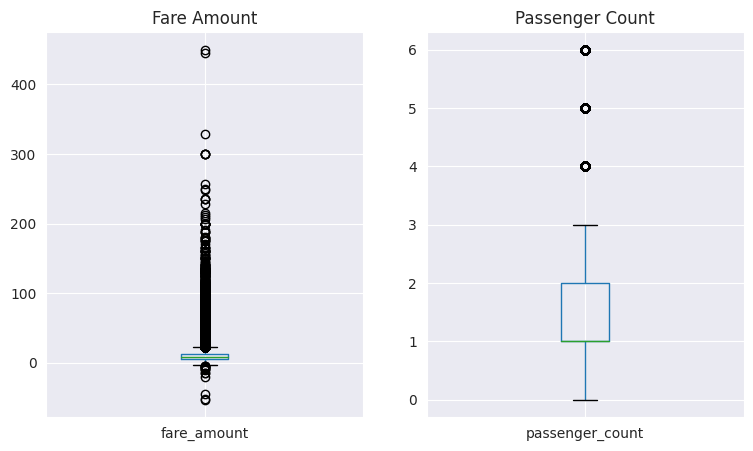

In [57]:
fig, ax = plt.subplots(1,2)

train_df.boxplot(column='fare_amount', ax=ax[0])
ax[0].set_title('Fare Amount')

train_df.boxplot(column='passenger_count', ax=ax[1])
ax[1].set_title('Passenger Count')

plt.show()

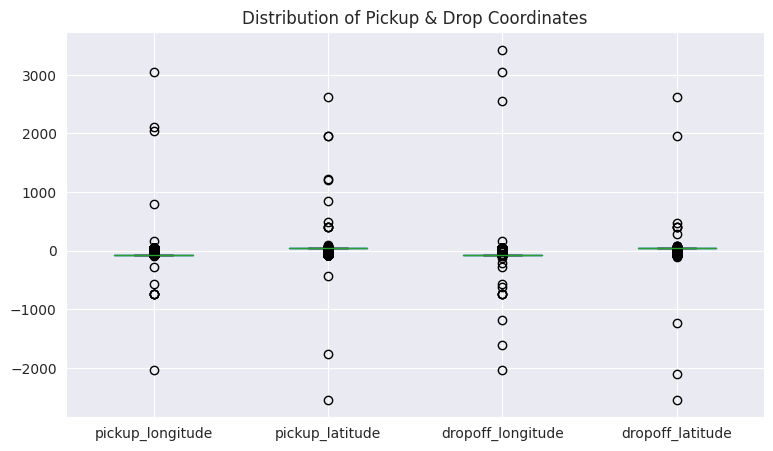

In [59]:
matplotlib.rcParams['figure.figsize'] = (9,5)

ax= train_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].boxplot()
ax.set_title('Distribution of Pickup & Drop Coordinates')

plt.show()

In [60]:
def upper_lower_bounds(x):
  q1 = np.percentile(x, 25)
  q3 = np.percentile(x, 75)
  iqr = q3-q1
  u = q3+ (1.5*iqr)
  l = q1- (1.5*iqr)
  return (l,u)

In [73]:
print('pickup_longitude:', upper_lower_bounds(train_df['pickup_longitude']))
print('pickup_latitude:', upper_lower_bounds(train_df['pickup_latitude']))
print('dropoff_longitude:', upper_lower_bounds(train_df['dropoff_longitude']))
print('dropoff_latitude:', upper_lower_bounds(train_df['dropoff_latitude']))

pickup_longitude: (-74.02951431274414, -73.92969131469727)
pickup_latitude: (40.686676025390625, 40.8153076171875)
dropoff_longitude: (-74.03307723999023, -73.92202377319336)
dropoff_latitude: (40.682782125, 40.819355125)


In [83]:
train_df = train_df[(train_df['pickup_longitude']>=-75) & 
                    (train_df['pickup_longitude']<=-72) & 
                    (train_df['dropoff_longitude']>=-75) & 
                    (train_df['dropoff_longitude']<=-72) & 
                    (train_df['pickup_latitude']>=39) & 
                    (train_df['pickup_latitude']<=42) & 
                    (train_df['dropoff_latitude']>=39) & 
                    (train_df['dropoff_latitude']<=42) & 
                    (train_df['fare_amount']>=1) & 
                    (train_df['passenger_count']>=1)]

In [84]:
train_df.shape

(541152, 8)

In [85]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,541152.000000,541152.000000,541152.000000,541152.000000,541152.000000,541152.000000
mean,11.333356,-73.975212,40.750919,-73.974281,40.751335,1.689960
std,9.715251,0.039087,0.031738,0.038534,0.034717,1.305042
min,2.000000,-74.869431,39.299580,-74.865402,39.482837,1.000000
25%,6.000000,-73.992294,40.736549,-73.991615,40.735530,1.000000
50%,8.500000,-73.982124,40.753311,-73.980598,40.753887,1.000000
75%,12.500000,-73.968353,40.767494,-73.965363,40.768418,2.000000
max,450.000000,-72.415070,41.759129,-72.433784,41.759130,6.000000


In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541152 entries, 0 to 554678
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                541152 non-null  object             
 1   fare_amount        541152 non-null  float32            
 2   pickup_datetime    541152 non-null  datetime64[ns, UTC]
 3   pickup_longitude   541152 non-null  float32            
 4   pickup_latitude    541152 non-null  float32            
 5   dropoff_longitude  541152 non-null  float32            
 6   dropoff_latitude   541152 non-null  float64            
 7   passenger_count    541152 non-null  int64              
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), int64(1), object(1)
memory usage: 28.9+ MB


## EDA

## References



*   List item
*   List item

